In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# final merged all four tables(oolpb_m.csv)
url = "https://drive.google.com/file/d/11k4BWbNhaJw9FRH36kBpyg3r2KbL3u0x/view?usp=share_link" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
final = pd.read_csv(path)

In [3]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53195 entries, 0 to 53194
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          53195 non-null  int64  
 1   created_date      53195 non-null  object 
 2   total_paid        53195 non-null  float64
 3   state             53195 non-null  object 
 4   id                53195 non-null  int64  
 5   id_order          53195 non-null  int64  
 6   product_id        53195 non-null  int64  
 7   product_quantity  53195 non-null  int64  
 8   sku               53195 non-null  object 
 9   unit_price        53195 non-null  float64
 10  date              53195 non-null  object 
 11  short             53195 non-null  object 
 12  name              53195 non-null  object 
 13  desc              53195 non-null  object 
 14  price             53195 non-null  float64
 15  in_stock          53195 non-null  int64  
 16  type              53184 non-null  object

In [4]:
final["created_date"] = pd.to_datetime(final["created_date"])
final["date"] = pd.to_datetime(final["date"])

In [5]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53195 entries, 0 to 53194
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          53195 non-null  int64         
 1   created_date      53195 non-null  datetime64[ns]
 2   total_paid        53195 non-null  float64       
 3   state             53195 non-null  object        
 4   id                53195 non-null  int64         
 5   id_order          53195 non-null  int64         
 6   product_id        53195 non-null  int64         
 7   product_quantity  53195 non-null  int64         
 8   sku               53195 non-null  object        
 9   unit_price        53195 non-null  float64       
 10  date              53195 non-null  datetime64[ns]
 11  short             53195 non-null  object        
 12  name              53195 non-null  object        
 13  desc              53195 non-null  object        
 14  price             5319

In [6]:
final.created_date.max() 


Timestamp('2018-03-14 12:03:52')

In [7]:
final.created_date.min()

Timestamp('2017-01-01 01:51:47')

**•	How products should be classified into different categories to simplify reports and analysis.**

In [8]:
top_30_type = (
    final.groupby(["type"])["name"]
    .count()
    .sort_values(ascending = False)
)
top_30_type.head(30)

type
11865403    4373
11935397    3872
1364        3135
11905404    3123
5384        2319
12215397    1982
12655397    1832
12585395    1815
1296        1489
1230        1409
1405        1182
1231        1123
12175397    1093
1325        1067
13835403     971
42945397     860
12755395     854
13555403     822
13615399     821
13855401     818
10142        802
51601716     796
5398         781
12635403     713
1433         707
1229         684
14305406     683
12995397     670
13005399     669
1298         567
Name: name, dtype: int64

In [9]:
final.loc[final["type"] == "51601716", :]

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type,long
6763,365911,2017-06-15 13:55:14,222.99,Completed,1268700,365911,0,1,PAC2053,219.00,2017-06-15 13:14:56,PAC,Second hand - iPhone 5s 16GB Space Gray,Apple iPhone 5s 16GB Second Hand Free Color Gr...,409.0,0,51601716,Pack
6764,368389,2017-06-23 13:00:07,202.99,Completed,1273767,368389,0,1,PAC2053,199.00,2017-06-23 12:58:20,PAC,Second hand - iPhone 5s 16GB Space Gray,Apple iPhone 5s 16GB Second Hand Free Color Gr...,409.0,0,51601716,Pack
6765,369940,2017-06-28 13:58:12,205.99,Completed,1276864,369940,0,1,PAC2053,199.00,2017-06-28 13:45:06,PAC,Second hand - iPhone 5s 16GB Space Gray,Apple iPhone 5s 16GB Second Hand Free Color Gr...,409.0,0,51601716,Pack
6766,370462,2017-06-29 20:30:33,404.99,Completed,1277983,370462,0,1,PAC2053,199.00,2017-06-29 20:25:57,PAC,Second hand - iPhone 5s 16GB Space Gray,Apple iPhone 5s 16GB Second Hand Free Color Gr...,409.0,0,51601716,Pack
6767,374982,2017-07-10 16:49:16,202.99,Completed,1288576,374982,0,1,PAC2053,199.00,2017-07-10 16:45:56,PAC,Second hand - iPhone 5s 16GB Space Gray,Apple iPhone 5s 16GB Second Hand Free Color Gr...,409.0,0,51601716,Pack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51714,508659,2018-02-09 09:36:59,322.99,Completed,1607229,508659,0,1,AP20305,319.00,2018-02-09 09:31:46,AP2,Like new - Apple iPhone 32GB Rose Gold,Refurbished 32GB iPhone rose gold color,419.0,0,51601716,Apple
51715,511648,2018-02-14 18:08:23,325.99,Completed,1614138,511648,0,1,AP20305,319.00,2018-02-14 18:03:58,AP2,Like new - Apple iPhone 32GB Rose Gold,Refurbished 32GB iPhone rose gold color,419.0,0,51601716,Apple
51725,431624,2017-11-23 19:27:37,289.11,Completed,1421325,431624,0,1,AP20258,284.12,2017-11-22 11:56:51,AP2,Like new - Apple iPhone 16GB Silver,Apple iPhone SE Free Refurbished 16GB Color Si...,489.0,0,51601716,Apple
51787,497787,2018-01-24 17:26:37,325.99,Completed,1578736,497787,0,1,AP20413,319.00,2018-01-24 17:14:06,AP2,Like new - Apple iPhone 32GB Gold,SE iPhone with 4-inch screen 32 free GB.,419.0,0,51601716,Apple


In [10]:
final.loc[final['type'] == '11865403', 'category'] = 'Accessories'  
final.loc[final['type'] == '11935397', 'category'] = 'State Drives/Hard Drives'
final.loc[final['type'] == '1364', 'category'] = 'Storage'
final.loc[final['type'] == '11905404', 'category'] = 'Accessories'
final.loc[final['type'] == '5384', 'category'] = 'Accessories'
final.loc[final['type'] == '12215397', 'category'] = 'State Drives/Hard Drives'
final.loc[final['type'] == '12655397', 'category'] = 'State Drives/Hard Drives'
final.loc[final['type'] == '12585395', 'category'] = 'Accessories'
final.loc[final['type'] == '1296', 'category'] = 'Monitors'
final.loc[final['type'] == '1230', 'category'] = 'Accessories'
final.loc[final['type'] == '1405', 'category'] = 'Accessories'
final.loc[final['type'] == '1231', 'category'] = 'Apple Care'
final.loc[final['type'] == '12175397', 'category'] = 'Storage'
final.loc[final['type'] == '1325', 'category'] = 'Accessories'
final.loc[final['type'] == '13835403', 'category'] = 'Accessories'
final.loc[final['type'] == '42945397', 'category'] = 'Storage'
final.loc[final['type'] == '12755395', 'category'] = 'State Drives/Hard Drives'
final.loc[final['type'] == '13555403', 'category'] = 'Accessories'
final.loc[final['type'] == '13615399', 'category'] = 'Accessories'
final.loc[final['type'] == '13855401', 'category'] = 'Monitors'
final.loc[final['type'] == '10142', 'category'] = 'Accessories'
final.loc[final['type'] == '51601716', 'category'] = 'Second hand iPhones'
final.loc[final['type'] == '5398', 'category'] = 'Accessories'
final.loc[final['type'] == '12635403', 'category'] = 'Accessories'
final.loc[final['type'] == '1433', 'category'] = 'State Drives/Hard Drives'
final.loc[final['type'] == '1229', 'category'] = 'Accessories'
final.loc[final['type'] == '14305406', 'category'] = 'Storage'
final.loc[final['type'] == '12995397', 'category'] = 'State Drives/Hard Drives'
final.loc[final['type'] == '13005399', 'category'] = 'Storage'
final.loc[final['type'] == '1298', 'category'] = 'Accessories'
final.loc[(final['type'] != '11865403') & (final['type'] != '11935397') & (final['type'] != '1364')
                             & (final['type'] != '11905404') & (final['type'] != '5384') & (final['type'] != '12215397') 
                             & (final['type'] != '12655397') & (final['type'] != '12585395') & (final['type'] != '1296')
                             & (final['type'] != '1230') & (final['type'] != '1405') & (final['type'] != '1231') 
                             & (final['type'] != '12175397') & (final['type'] != '1325') & (final['type'] != '13835403')
                             & (final['type'] != '42945397') & (final['type'] != '12755395') & (final['type'] != '13555403')
                             & (final['type'] != '13615399') & (final['type'] != '13855401') & (final['type'] != '10142')
                             & (final['type'] != '51601716') & (final['type'] != '5398') & (final['type'] != '12635403')
                             & (final['type'] != '1433') & (final['type'] != '1229') & (final['type'] != '14305406')
                             & (final['type'] != '12995397') & (final['type'] != '13005399') & (final['type'] != '1298')
                              , 'category'] = 'Other' 
final

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type,long,category
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives
1,269440,2017-01-18 19:15:00,213.98,Completed,1151714,269440,0,1,LAC0212,136.99,2017-01-18 19:12:49,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives
2,304328,2017-01-07 17:27:26,177.97,Completed,1133913,304328,0,1,LAC0212,136.99,2017-01-07 17:13:59,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives
3,305628,2017-01-09 12:30:07,140.98,Completed,1136917,305628,0,1,LAC0212,136.99,2017-01-09 12:22:46,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives
4,306550,2017-01-10 15:28:00,143.98,Completed,1139281,306550,0,1,LAC0212,136.99,2017-01-10 15:23:11,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53190,523660,2018-03-09 09:50:36,83.98,Completed,1641088,523660,0,1,QAR0007,79.99,2018-03-09 09:48:18,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories
53191,523717,2018-03-09 11:21:24,84.98,Completed,1641202,523717,0,1,QAR0007,79.99,2018-03-09 11:19:26,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories
53192,524124,2018-03-09 20:21:23,84.98,Completed,1642236,524124,0,1,QAR0007,79.99,2018-03-09 20:18:27,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories
53193,525381,2018-03-11 12:01:18,83.98,Completed,1645994,525381,0,1,QAR0007,79.99,2018-03-11 11:41:19,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories


**To find discount.**

In [11]:
discount = final['price'] - final['unit_price']
final['discount'] = discount
final

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type,long,category,discount
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,10.83
1,269440,2017-01-18 19:15:00,213.98,Completed,1151714,269440,0,1,LAC0212,136.99,2017-01-18 19:12:49,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00
2,304328,2017-01-07 17:27:26,177.97,Completed,1133913,304328,0,1,LAC0212,136.99,2017-01-07 17:13:59,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00
3,305628,2017-01-09 12:30:07,140.98,Completed,1136917,305628,0,1,LAC0212,136.99,2017-01-09 12:22:46,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00
4,306550,2017-01-10 15:28:00,143.98,Completed,1139281,306550,0,1,LAC0212,136.99,2017-01-10 15:23:11,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53190,523660,2018-03-09 09:50:36,83.98,Completed,1641088,523660,0,1,QAR0007,79.99,2018-03-09 09:48:18,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00
53191,523717,2018-03-09 11:21:24,84.98,Completed,1641202,523717,0,1,QAR0007,79.99,2018-03-09 11:19:26,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00
53192,524124,2018-03-09 20:21:23,84.98,Completed,1642236,524124,0,1,QAR0007,79.99,2018-03-09 20:18:27,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00
53193,525381,2018-03-11 12:01:18,83.98,Completed,1645994,525381,0,1,QAR0007,79.99,2018-03-11 11:41:19,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00


In [12]:
final ['percentage'] = (final ['discount'] / final ['price']*100).round(2)
final

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,...,short,name,desc,price,in_stock,type,long,category,discount,percentage
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,...,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,10.83,7.74
1,269440,2017-01-18 19:15:00,213.98,Completed,1151714,269440,0,1,LAC0212,136.99,...,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00,2.14
2,304328,2017-01-07 17:27:26,177.97,Completed,1133913,304328,0,1,LAC0212,136.99,...,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00,2.14
3,305628,2017-01-09 12:30:07,140.98,Completed,1136917,305628,0,1,LAC0212,136.99,...,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00,2.14
4,306550,2017-01-10 15:28:00,143.98,Completed,1139281,306550,0,1,LAC0212,136.99,...,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00,2.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53190,523660,2018-03-09 09:50:36,83.98,Completed,1641088,523660,0,1,QAR0007,79.99,...,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00,38.46
53191,523717,2018-03-09 11:21:24,84.98,Completed,1641202,523717,0,1,QAR0007,79.99,...,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00,38.46
53192,524124,2018-03-09 20:21:23,84.98,Completed,1642236,524124,0,1,QAR0007,79.99,...,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00,38.46
53193,525381,2018-03-11 12:01:18,83.98,Completed,1645994,525381,0,1,QAR0007,79.99,...,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00,38.46


In [13]:
unit_price_total = final['unit_price'] * final['product_quantity']
final['unit_price_total'] = unit_price_total
final

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,...,name,desc,price,in_stock,type,long,category,discount,percentage,unit_price_total
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,...,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,10.83,7.74,129.16
1,269440,2017-01-18 19:15:00,213.98,Completed,1151714,269440,0,1,LAC0212,136.99,...,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00,2.14,136.99
2,304328,2017-01-07 17:27:26,177.97,Completed,1133913,304328,0,1,LAC0212,136.99,...,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00,2.14,136.99
3,305628,2017-01-09 12:30:07,140.98,Completed,1136917,305628,0,1,LAC0212,136.99,...,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00,2.14,136.99
4,306550,2017-01-10 15:28:00,143.98,Completed,1139281,306550,0,1,LAC0212,136.99,...,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00,2.14,136.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53190,523660,2018-03-09 09:50:36,83.98,Completed,1641088,523660,0,1,QAR0007,79.99,...,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00,38.46,79.99
53191,523717,2018-03-09 11:21:24,84.98,Completed,1641202,523717,0,1,QAR0007,79.99,...,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00,38.46,79.99
53192,524124,2018-03-09 20:21:23,84.98,Completed,1642236,524124,0,1,QAR0007,79.99,...,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00,38.46,79.99
53193,525381,2018-03-11 12:01:18,83.98,Completed,1645994,525381,0,1,QAR0007,79.99,...,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00,38.46,79.99


**Top discounted products**



In [14]:
product_discount_category = (
    final.groupby(["category"])["percentage"]
    .mean(["percentage"])
    .nlargest(30).round(0))
product_discount_category

category
Accessories                 26.0
Apple Care                  22.0
Other                       20.0
State Drives/Hard Drives    18.0
Storage                     16.0
Second hand iPhones         15.0
Monitors                    12.0
Name: percentage, dtype: float64

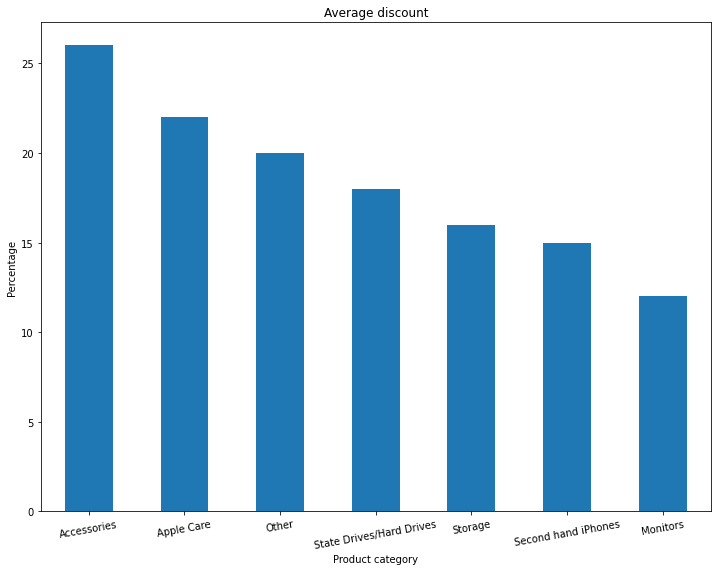

In [15]:
#from matplotlib import pyplot as plt
plt.figure(figsize=(12, 9))
product_discount_category.plot(kind = 'bar');
plt.xticks(rotation=10)
plt.title("Average discount");
plt.xlabel("Product category");
plt.ylabel("Percentage");

In [16]:
product_discount_category_plot = product_discount_category.to_frame()
product_discount_category_plot

,percentage
category,
Accessories,26.0
Apple Care,22.0
Other,20.0
State Drives/Hard Drives,18.0
Storage,16.0
Second hand iPhones,15.0
Monitors,12.0


In [17]:
product_discount_category_plot = product_discount_category_plot.reset_index()
product_discount_category_plot

,category,percentage
0,Accessories,26.0
1,Apple Care,22.0
2,Other,20.0
3,State Drives/Hard Drives,18.0
4,Storage,16.0
5,Second hand iPhones,15.0
6,Monitors,12.0


In [18]:
product_discount_category_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   category    7 non-null      object 
 1   percentage  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


In [19]:
product_discount_category_plot_final = product_discount_category_plot.rename(columns={"category" : "Product category", "percentage" : "Percentage"})

In [20]:
product_discount_category_plot_final

,Product category,Percentage
0,Accessories,26.0
1,Apple Care,22.0
2,Other,20.0
3,State Drives/Hard Drives,18.0
4,Storage,16.0
5,Second hand iPhones,15.0
6,Monitors,12.0


In [21]:
#change order of rows for plotting
index=["2","3","0","4","6","5","1"]


product_discount_category_plot_final_changed = pd.DataFrame({"Product category": ["Other", "State Drives/Hard Drives", "Accessories", "Storage",  "Monitors", "Second hand iPhones","Apple Care"],
                                                    "Percentage": [20.0, 18.0, 26.0, 16.0, 12.0, 15.0, 12.0]},
                                                    index=index)


product_discount_category_plot_final_changed

,Product category,Percentage
2,Other,20.0
3,State Drives/Hard Drives,18.0
0,Accessories,26.0
4,Storage,16.0
6,Monitors,12.0
5,Second hand iPhones,15.0
1,Apple Care,12.0


## Plot Discount

Text(0.5, 1.0, 'Discount')

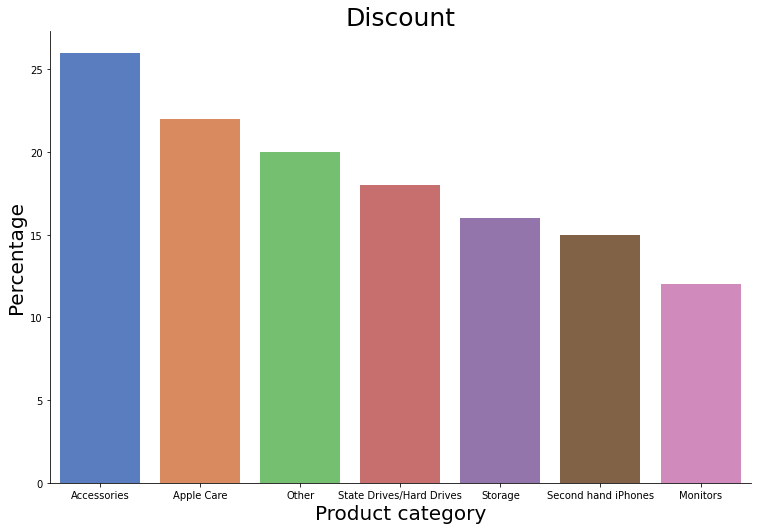

In [28]:
sns.catplot(kind="bar",
            data=product_discount_category_plot_final,
            x="Product category",
            y="Percentage",
            height=7,
            aspect=1.5,
            palette="muted");

plt.xlabel('Product category', fontsize=20);
plt.ylabel('Percentage', fontsize=20);
plt.title('Discount', fontsize=25)



Text(0.5, 1.0, 'Discount')

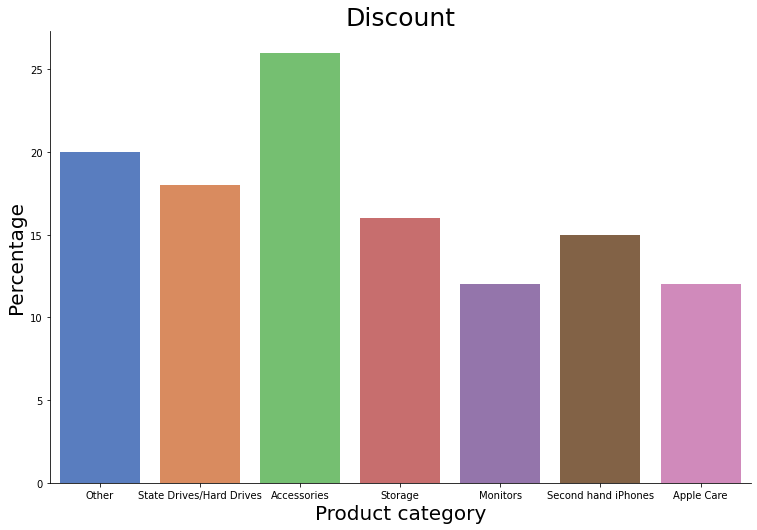

In [30]:
sns.catplot(kind="bar",
            data=product_discount_category_plot_final_changed,
            x="Product category",
            y="Percentage",
            height=7,
            aspect=1.5,
            palette="muted");

plt.xlabel('Product category', fontsize=20);
plt.ylabel('Percentage', fontsize=20);
plt.title('Discount', fontsize=25)


**Top ordered products**

In [ ]:
product_order_category = (
    final.groupby(["category"])["order_id"]
    .count()
    .nlargest(30)
)
product_order_category

In [ ]:
#from matplotlib import pyplot as plt
#plt.figure(figsize=(12, 9))
#product_order_category.plot(kind = "bar");
#plt.xticks(rotation=10)
#plt.title("Count of Orders according to Product Categories");
#plt.xlabel("Product Category");
#plt.ylabel("Count of Orders");

**Top Revenue products**

In [ ]:
product_revenue_category = (
    final.groupby(["category"])["unit_price"]
    .sum(["unit_price"]).round(2)
    .nlargest(30))
product_revenue_category


In [ ]:
product_revenue_category_plot = product_revenue_category.to_frame()
product_revenue_category_plot

In [ ]:
product_revenue_category_plot = product_revenue_category.reset_index()
product_revenue_category_plot

In [ ]:
product_revenue_category_plot.info()

In [ ]:
product_revenue_category_plot_final = product_revenue_category_plot.rename(columns={"category" : "Product category", "unit_price" : "Million"})

In [ ]:
product_revenue_category_plot_final

## Plot Revenue

In [ ]:
sns.catplot(kind="bar",
            data=product_revenue_category_plot_final,
            x="Product category",
            y="Million",
            height=7,
            aspect=1.5,
            palette="muted");

plt.xlabel('Product category', fontsize=20);
plt.ylabel('Million', fontsize=20);
plt.title('Revenue', fontsize=25)


In [ ]:
trend = final.groupby([pd.Grouper(key='created_date',freq='Q'),'category'])['unit_price','percentage'].mean()
trend


## Calculation of Order quantity vs. Revenue vs. Discount rate for Q4 / Festival season

In [38]:
#merged table for Q4 for plotting
q4_2017_monthly = final.loc[final.created_date.between("2017-10-01", "2017-12-31")]

In [39]:
q4_2017_monthly

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,...,name,desc,price,in_stock,type,long,category,discount,percentage,unit_price_total
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,...,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,10.83,7.74,129.16
18,354568,2017-11-27 13:55:18,120.34,Completed,1458072,354568,0,1,LAC0212,116.35,...,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,23.64,16.89,116.35
65,407235,2017-10-02 13:41:04,323.73,Completed,1367205,407235,0,1,LAC0212,111.34,...,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,28.65,20.47,111.34
66,407289,2017-10-02 12:27:58,118.33,Completed,1367328,407289,0,1,LAC0212,111.34,...,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,28.65,20.47,111.34
67,407565,2017-10-02 22:45:53,115.33,Completed,1367898,407565,0,1,LAC0212,111.34,...,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,28.65,20.47,111.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53134,466579,2017-12-19 11:02:59,99.99,Completed,1504514,466579,0,1,GAM0007,99.99,...,Gamevice Command games for iPhone X / 8/7/6 / ...,Classic gamepad controls for iPhone X / 8/7/6 ...,109.95,1,11905404,Gamevice,Accessories,9.96,9.06,99.99
53135,472469,2017-12-26 19:46:09,93.98,Completed,1517055,472469,0,1,GAM0007,89.99,...,Gamevice Command games for iPhone X / 8/7/6 / ...,Classic gamepad controls for iPhone X / 8/7/6 ...,109.95,1,11905404,Gamevice,Accessories,19.96,18.15,89.99
53136,474559,2017-12-28 10:50:25,96.98,Completed,1521281,474559,0,1,GAM0007,89.99,...,Gamevice Command games for iPhone X / 8/7/6 / ...,Classic gamepad controls for iPhone X / 8/7/6 ...,109.95,1,11905404,Gamevice,Accessories,19.96,18.15,89.99
53137,475684,2017-12-28 23:36:53,96.98,Completed,1523656,475684,0,1,GAM0007,89.99,...,Gamevice Command games for iPhone X / 8/7/6 / ...,Classic gamepad controls for iPhone X / 8/7/6 ...,109.95,1,11905404,Gamevice,Accessories,19.96,18.15,89.99


### Revenue

In [40]:
#monthly average revenue for Q4
q4_2017_monthly_revenue = q4_2017_monthly.groupby(pd.Grouper(key='created_date',freq='M'))['unit_price'].mean()

In [41]:
q4_2017_monthly_revenue.head()

created_date
2017-10-31    140.238330
2017-11-30    164.174323
2017-12-31    152.044835
Freq: M, Name: unit_price, dtype: float64

In [42]:
q4_2017_monthly_revenue_df = q4_2017_monthly_revenue.to_frame()
q4_2017_monthly_revenue_df

,unit_price
created_date,
2017-10-31,140.238330
2017-11-30,164.174323
2017-12-31,152.044835


In [43]:
q4_2017_monthly_revenue_df_plot = q4_2017_monthly_revenue_df.reset_index()

In [44]:
q4_2017_monthly_revenue_df_plot

,created_date,unit_price
0,2017-10-31,140.238330
1,2017-11-30,164.174323
2,2017-12-31,152.044835


In [45]:
q4_2017_monthly_revenue_df_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_date  3 non-null      datetime64[ns]
 1   unit_price    3 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 176.0 bytes


In [46]:
#change datetime to object
q4_2017_monthly_revenue_df_plot['created_date'] = q4_2017_monthly_revenue_df_plot['created_date'].dt.strftime('%m/%d/%Y')

In [47]:
q4_2017_monthly_revenue_df_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   created_date  3 non-null      object 
 1   unit_price    3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 176.0+ bytes


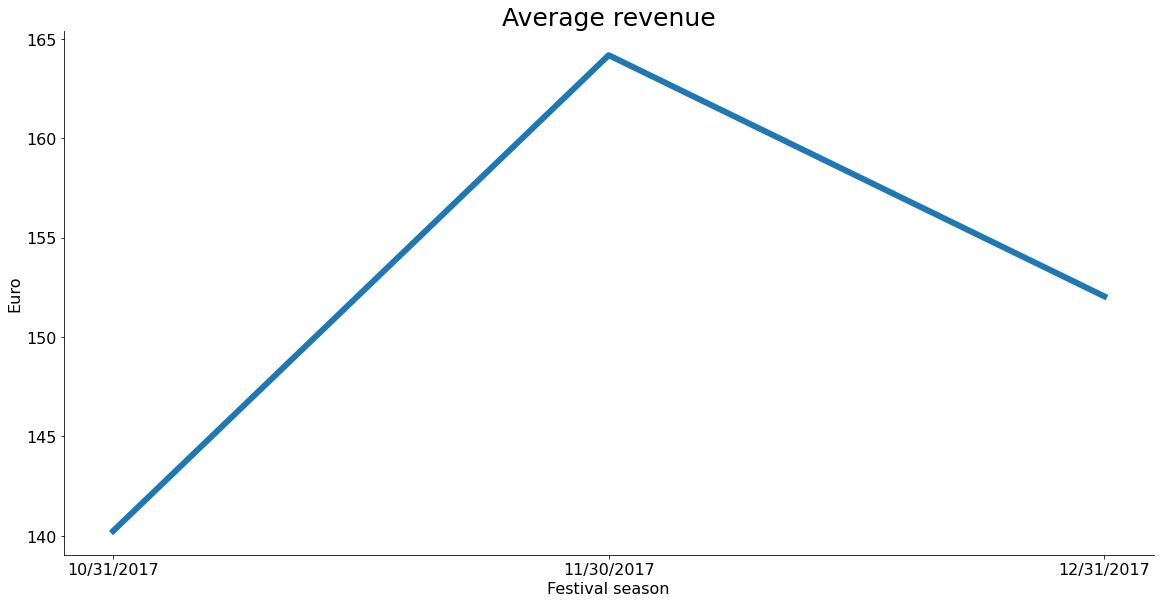

In [48]:
(
sns.relplot(kind="line",
            data=q4_2017_monthly_revenue_df_plot,
            x="created_date",
            y="unit_price",
            height=8,
            aspect=2,
            linewidth =6)
);


#modify individual font size of elements
plt.xlabel('Festival season', fontsize=16);
plt.ylabel('Euro', fontsize=16);
plt.title('Average revenue', fontsize=25);
plt.tick_params(labelsize=16);


### Order count

In [ ]:
#monthly count of orders for Q4
q4_2017_monthly_order = q4_2017_monthly.groupby(pd.Grouper(key='created_date',freq='M'))['order_id'].count()

In [ ]:
q4_2017_monthly_order.head()

In [ ]:
q4_2017_monthly_order_df = q4_2017_monthly_order.to_frame()
q4_2017_monthly_order_df

In [ ]:
q4_2017_monthly_order_df_plot = q4_2017_monthly_order_df.reset_index()

In [ ]:
q4_2017_monthly_order_df_plot

In [ ]:
q4_2017_monthly_order_df_plot.info()

In [ ]:
#change datetime to object
q4_2017_monthly_order_df_plot['created_date'] = q4_2017_monthly_order_df_plot['created_date'].dt.strftime('%m/%d/%Y')

In [ ]:
q4_2017_monthly_order_df_plot.info()

In [ ]:
(
sns.relplot(kind="line",
            data=q4_2017_monthly_order_df_plot,
            x="created_date",
            y="order_id",
            height=8,
            aspect=2,
            linewidth =6)
);


#modify individual font size of elements
plt.xlabel('Festival season', fontsize=16);
plt.ylabel('Count', fontsize=16);
plt.title('Order quantity', fontsize=25);
plt.tick_params(labelsize=16);


### Discount

In [ ]:
#monthly average discount for Q4
q4_2017_monthly_discount = q4_2017_monthly.groupby(pd.Grouper(key='created_date',freq='M'))['percentage'].mean()

In [ ]:
q4_2017_monthly_discount

In [ ]:
q4_2017_monthly_discount_df = q4_2017_monthly_discount.to_frame()
q4_2017_monthly_discount_df

In [ ]:
q4_2017_monthly_discount_df_plot = q4_2017_monthly_discount_df.reset_index()

In [ ]:
q4_2017_monthly_discount_df_plot

In [ ]:
q4_2017_monthly_discount_df_plot.info()

In [ ]:
#change datetime to object
q4_2017_monthly_discount_df_plot['created_date'] = q4_2017_monthly_discount_df_plot['created_date'].dt.strftime('%m/%d/%Y')

In [ ]:
q4_2017_monthly_discount_df_plot.info()

In [ ]:
(
sns.relplot(kind="line",
            data=q4_2017_monthly_discount_df_plot,
            x="created_date",
            y="percentage",
            height=8,
            aspect=2,
            linewidth =6)
);


#modify individual font size of elements
plt.xlabel('Festival season', fontsize=16);
plt.ylabel('Percentage', fontsize=16);
plt.title('Discount rate', fontsize=25);
plt.tick_params(labelsize=16);


In [32]:
order_overview = (
    final.groupby([pd.Grouper(key='created_date',freq='D')])["order_id"]
   .count()
)
order_overview_df = pd.DataFrame(order_overview)
order_overview_df

,order_id
created_date,
2017-01-01,121
2017-01-02,367
2017-01-03,307
2017-01-04,129
2017-01-05,153
...,...
2018-03-10,79
2018-03-11,74
2018-03-12,142


In [33]:
disc_overview = (
    final.groupby([pd.Grouper(key='created_date',freq='D')])["discount"]
   .mean()
)
disc_overview_df = pd.DataFrame(disc_overview)
disc_overview_df

,discount
created_date,
2017-01-01,24.627934
2017-01-02,16.190245
2017-01-03,17.741042
2017-01-04,15.979922
2017-01-05,52.182288
...,...
2018-03-10,27.400506
2018-03-11,30.016216
2018-03-12,28.844014


In [34]:
data_overview_1 = order_overview_df.merge(disc_overview_df, on = 'created_date')
data_overview_1

,order_id,discount
created_date,,
2017-01-01,121,24.627934
2017-01-02,367,16.190245
2017-01-03,307,17.741042
2017-01-04,129,15.979922
2017-01-05,153,52.182288
...,...,...
2018-03-10,79,27.400506
2018-03-11,74,30.016216
2018-03-12,142,28.844014


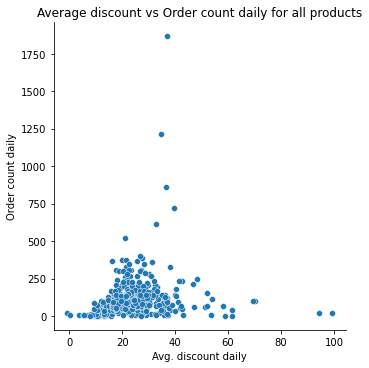

In [35]:
chart = sns.relplot(data=data_overview_1,
            x="discount",
            y="order_id");
chart.set(title='Average discount vs Order count daily for all products', ylabel='Order count daily', xlabel="Avg. discount daily");

In [25]:
revenue_overview = (
    final.groupby([pd.Grouper(key='created_date',freq='D')])["unit_price_total"]
   .sum()
)
revenue_overview_df = pd.DataFrame(revenue_overview)
revenue_overview_df

,unit_price_total
created_date,
2017-01-01,16343.03
2017-01-02,37644.65
2017-01-03,35696.76
2017-01-04,16463.16
2017-01-05,11996.38
...,...
2018-03-10,8382.58
2018-03-11,9135.05
2018-03-12,23635.13


In [26]:
data_overview_2 = revenue_overview_df.merge(disc_overview_df, on = 'created_date')
data_overview_2

,unit_price_total,discount
created_date,,
2017-01-01,16343.03,24.627934
2017-01-02,37644.65,16.190245
2017-01-03,35696.76,17.741042
2017-01-04,16463.16,15.979922
2017-01-05,11996.38,52.182288
...,...,...
2018-03-10,8382.58,27.400506
2018-03-11,9135.05,30.016216
2018-03-12,23635.13,28.844014


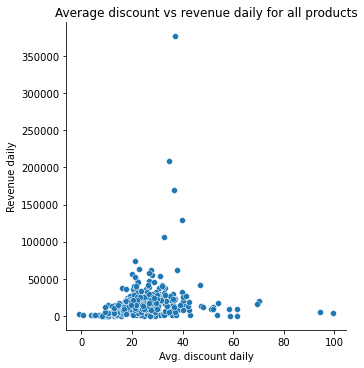

In [27]:
chart = sns.relplot(data=data_overview_2,
            x="discount",
            y="unit_price_total");
chart.set(title='Average discount vs revenue daily for all products', ylabel='Revenue daily', xlabel="Avg. discount daily");